<h2><b>COLLABORATIVE TYPE RECOMENDATION SYSTEM</b></h2>
<br>

Collaborative Filtering: For each user, recommender systems recommend items based on how similar users liked the item. Let’s say Alice and Bob have similar interests in video games. Alice recently played and enjoyed the game Legend of Zelda: Breathe of the Wild. Bob has not played this game, but because the system has learned that Alice and Bob have similar tastes, it recommends this game to Bob. In addition to user similarity, recommender systems can also perform collaborative filtering using item similarity (“Users who liked this item also liked X”).
       <hr>

In [53]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('Documents/ml-20m/movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('Documents/ml-20m/ratings.csv')
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [55]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

In [56]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [57]:
#Dropping the genres column
movies_df = movies_df.drop('genres', 1)

In [58]:
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [59]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [60]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


<hr>

<a id="ref3"></a>
# Collaborative Filtering

Now, time to start our work on recommendation systems. 

The first technique we're going to take a look at is called __Collaborative Filtering__, which is also known as __User-User Filtering__. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the __Pearson Correlation Function__.

The process for creating a User Based recommendation system is as follows:
- Select a user with the movies the user has watched
- Based on his rating to movies, find the top X neighbours 
- Get the watched movie record of the user for each neighbour.
- Calculate a similarity score using some formula
- Recommend the items with the highest score


Let's begin by creating an input user to recommend movies to:

To add more movies, write the movies in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .

In [61]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':5},
            {'title':"Pulp Fiction", 'rating':3.5},
            {'title':'Akira', 'rating':4.5},
            {'title':'Matrix,The','rating':5},
         {'title':"Bandit Queen",'rating':1}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,rating,title
0,5.0,"Breakfast Club, The"
1,3.5,Toy Story
2,5.0,Jumanji
3,3.5,Pulp Fiction
4,4.5,Akira
5,5.0,"Matrix,The"
6,1.0,Bandit Queen


In [62]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can 4get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputMovies,inputId)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,rating,title,movieId
0,5.0,"Breakfast Club, The",1968
1,3.5,Toy Story,1
2,5.0,Jumanji,2
3,3.5,Pulp Fiction,296
4,4.5,Akira,1274
5,1.0,Bandit Queen,2284



#### The users who has seen the same movies
Now with the movie ID's in our input, we can now get the subset of users that have watched and reviewed the movies in our input.
<br/>
<hr/>

Text(0.5, 1.0, 'Bandit Queen')

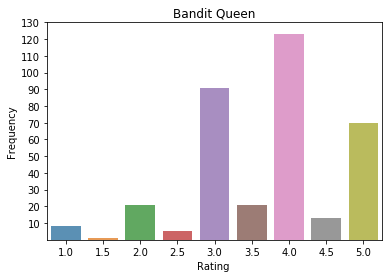

In [63]:
#Filtering out users that have watched movies that the input has watched and storing it
%matplotlib inline
import seaborn as sns
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
k=userSubset[userSubset['movieId']==2284]['rating'].value_counts()
sns.barplot(k.index,k.values,alpha=0.8)
plt.yticks([10,20,30,40,50,60,70,80,90,100,110,120,130])
plt.xlabel("Rating ")
plt.ylabel("Frequency")
plt.title("Bandit Queen")

In [64]:
userSubset['userId'].value_counts()

52636     6
81343     6
64577     6
91954     6
83090     6
29819     6
51608     6
102159    6
75299     6
118205    6
20294     6
118898    6
131904    6
125794    6
93219     6
123514    6
60267     6
61824     6
117395    6
100778    6
122160    6
59457     6
94773     6
71975     6
8405      6
115811    6
41929     6
6207      6
75469     6
111472    5
         ..
104590    1
123137    1
114949    1
133500    1
61731     1
317       1
12603     1
106050    1
10552     1
20791     1
104003    1
26928     1
114246    1
53543     1
55590     1
51492     1
63778     1
108808    1
57633     1
69919     1
71966     1
112199    1
76056     1
88342     1
82197     1
92432     1
116297    1
100620    1
112906    1
2049      1
Name: userId, Length: 93882, dtype: int64

In [65]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])
userSubsetGroup.get_group(52636)

,userId,movieId,rating
7638509,52636,1,5.0
7638510,52636,2,5.0
7638567,52636,296,4.0
7638905,52636,1274,3.0
7639110,52636,1968,4.0
7639221,52636,2284,3.0


In [66]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
userSubsetGroup[0:3]

[(6207,         userId  movieId  rating
  928947    6207        1     5.0
  928948    6207        2     3.0
  928979    6207      296     5.0
  929125    6207     1274     4.0
  929190    6207     1968     4.0
  929225    6207     2284     5.0), (8405,          userId  movieId  rating
  1225775    8405        1     5.0
  1225776    8405        2     3.0
  1225976    8405      296     5.0
  1226637    8405     1274     5.0
  1227032    8405     1968     4.0
  1227297    8405     2284     3.0), (20294,          userId  movieId  rating
  2993533   20294        1     4.0
  2993534   20294        2     2.0
  2993599   20294      296     5.0
  2993870   20294     1274     4.0
  2993989   20294     1968     4.0
  2994036   20294     2284     3.0)]

In [67]:
userSubsetGroup = userSubsetGroup[0:200]

<br/>
<h1> Similarity of users to input user</h1>
Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
we're going to find out how similar each user is to the input through the __Pearson Correlation Coefficient__. It is used to measure the strength of a linear association between two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.
<br/><br/>

Now, we calculate the Pearson Correlation between input user and subset group, and store it in a dictionary, where the key is the user Id and the value is the coefficient


In [68]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [69]:
pearsonCorrelationDict.items()

dict_items([(6207, -0.7307981486470356), (8405, 0.23601465584129164), (20294, 0.0), (29819, -0.4927040113062218), (41929, -0.6605515706626152), (51608, 0.42365927286816174), (52636, 0.4447495899966607), (59457, -0.10948978029027183), (60267, -0.1310356045902398), (61824, -0.6999788190461225), (64577, -0.1188643277625491), (71975, 0.35168853523037313), (75299, -0.6419407387663697), (75469, -0.32576088963386574), (81343, -0.46035956188249266), (83090, 0.25520578355370444), (91954, -0.7764185376991513), (93219, -0.08119979429411507), (94773, -0.6419407387663694), (100778, -0.7307981486470356), (102159, -0.8153742483272113), (115811, -0.22446286705258273), (117395, -0.36073955268291136), (118205, -0.236014655841292), (118898, -0.04688072309384954), (122160, 0.38516444325982024), (123514, -0.19849338720843684), (125794, 0.38516444325982024), (131904, 0.0), (91, -0.13459547551454146), (294, 0.5160468465421282), (586, -0.3296902366978937), (648, -0.8385566513510503), (775, -0.702901946394417)

In [70]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,-0.730798,6207
1,0.236015,8405
2,0.000000,20294
3,-0.492704,29819
4,-0.660552,41929


In [71]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
55,0.906327,2959
100,0.589768,8805
75,0.589768,5504
30,0.516047,294
6,0.444750,52636


In [72]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,0.906327,2959,1,3.5
1,0.906327,2959,2,4.0
2,0.906327,2959,10,3.5
3,0.906327,2959,11,3.5
4,0.906327,2959,19,3.5


<br/>
Now all we need to do is simply multiply the movie rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

It shows the idea of all similar users to candidate movies for the input user:
<br/>

In [73]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head(10)

,similarityIndex,userId,movieId,rating,weightedRating
0,0.906327,2959,1,3.5,3.172144
1,0.906327,2959,2,4.0,3.625308
2,0.906327,2959,10,3.5,3.172144
3,0.906327,2959,11,3.5,3.172144
4,0.906327,2959,19,3.5,3.172144
5,0.906327,2959,29,4.0,3.625308
6,0.906327,2959,34,3.0,2.718981
7,0.906327,2959,39,2.0,1.812654
8,0.906327,2959,44,3.0,2.718981
9,0.906327,2959,47,3.5,3.172144


In [74]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,7.389525,26.859052
2,7.389525,27.343167
3,3.307701,9.584111
4,1.010696,2.336005
5,2.620194,6.459244


In [75]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.634747,1
2,3.700260,2
3,2.897515,3
4,2.311282,4
5,2.465178,5


In [76]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
5016,28.854451,5016
106642,13.215574,106642
111235,10.310383,111235
115170,9.739388,115170
6624,7.239611,6624
26913,7.108803,26913
6884,6.127714,6884
6196,6.060430,6196
31522,5.639595,31522


In [77]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
4920,5016,"Shipping News, The",2001
6097,6196,Cradle 2 the Grave,2003
6514,6624,Agent Cody Banks,2003
6774,6884,Veronica Guerin,2003
8899,26524,"Times of Harvey Milk, The",1984
9115,26913,Street Fighter II: The Animated Movie (Sutorît...,1994
9717,31522,"Marriage of Maria Braun, The (Ehe der Maria Br...",1979
22157,106642,"Day of the Doctor, The",2013
23348,111235,Jodorowsky's Dune,2013
24299,115170,"Judge, The",2014
